# Homework ADM 5

- Camilla Labbate 
- Khalmatay
- Federico Trionfetti 


In [26]:
import pandas as pd 
import numpy as np
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import heapq


## 1

In [27]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("flashgordon/usa-airport-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/camillalabbate/.cache/kagglehub/datasets/flashgordon/usa-airport-dataset/versions/2


In [28]:
files = os.listdir(path)
print("Files in dataset:", files)

csv_file = [file for file in files if file.endswith('.csv')][0]  
csv_path = os.path.join(path, csv_file)

df = pd.read_csv(csv_path)

print(df.head())

Files in dataset: ['Airports2.csv']
  Origin_airport Destination_airport    Origin_city Destination_city  \
0            MHK                 AMW  Manhattan, KS         Ames, IA   
1            EUG                 RDM     Eugene, OR         Bend, OR   
2            EUG                 RDM     Eugene, OR         Bend, OR   
3            EUG                 RDM     Eugene, OR         Bend, OR   
4            MFR                 RDM    Medford, OR         Bend, OR   

   Passengers  Seats  Flights  Distance    Fly_date  Origin_population  \
0          21     30        1       254  2008-10-01             122049   
1          41    396       22       103  1990-11-01             284093   
2          88    342       19       103  1990-12-01             284093   
3          11     72        4       103  1990-10-01             284093   
4           0     18        1       156  1990-02-01             147300   

   Destination_population  Org_airport_lat  Org_airport_long  \
0                   86

In [4]:
df.columns

Index(['Origin_airport', 'Destination_airport', 'Origin_city',
       'Destination_city', 'Passengers', 'Seats', 'Flights', 'Distance',
       'Fly_date', 'Origin_population', 'Destination_population',
       'Org_airport_lat', 'Org_airport_long', 'Dest_airport_lat',
       'Dest_airport_long'],
      dtype='object')

In [5]:
df.isnull().sum()

Origin_airport               0
Destination_airport          0
Origin_city                  0
Destination_city             0
Passengers                   0
Seats                        0
Flights                      0
Distance                     0
Fly_date                     0
Origin_population            0
Destination_population       0
Org_airport_lat           6954
Org_airport_long          6954
Dest_airport_lat          6807
Dest_airport_long         6807
dtype: int64

In [30]:
df=df.drop_duplicates()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565050 entries, 0 to 3606802
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Origin_airport          object 
 1   Destination_airport     object 
 2   Origin_city             object 
 3   Destination_city        object 
 4   Passengers              int64  
 5   Seats                   int64  
 6   Flights                 int64  
 7   Distance                int64  
 8   Fly_date                object 
 9   Origin_population       int64  
 10  Destination_population  int64  
 11  Org_airport_lat         float64
 12  Org_airport_long        float64
 13  Dest_airport_lat        float64
 14  Dest_airport_long       float64
dtypes: float64(4), int64(6), object(5)
memory usage: 435.2+ MB


In [32]:
print(df.describe())

         Passengers         Seats       Flights      Distance  \
count  3.565050e+06  3.565050e+06  3.565050e+06  3.565050e+06   
mean   2.720375e+03  4.095619e+03  3.760448e+01  6.954350e+02   
std    4.363210e+03  6.221537e+03  4.977841e+01  5.995712e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.150000e+02  1.730000e+02  2.000000e+00  2.740000e+02   
50%    1.161000e+03  2.074000e+03  2.500000e+01  5.180000e+02   
75%    3.541000e+03  5.442000e+03  5.500000e+01  9.260000e+02   
max    8.959700e+04  1.470620e+05  1.128000e+03  5.095000e+03   

       Origin_population  Destination_population  Org_airport_lat  \
count       3.565050e+06            3.565050e+06     3.558466e+06   
mean        5.864580e+06            5.889934e+06     3.772410e+01   
std         7.833335e+06            7.884462e+06     5.720273e+00   
min         1.300500e+04            1.288700e+04     1.972140e+01   
25%         1.035566e+06            1.029829e+06     3.363670e+01   


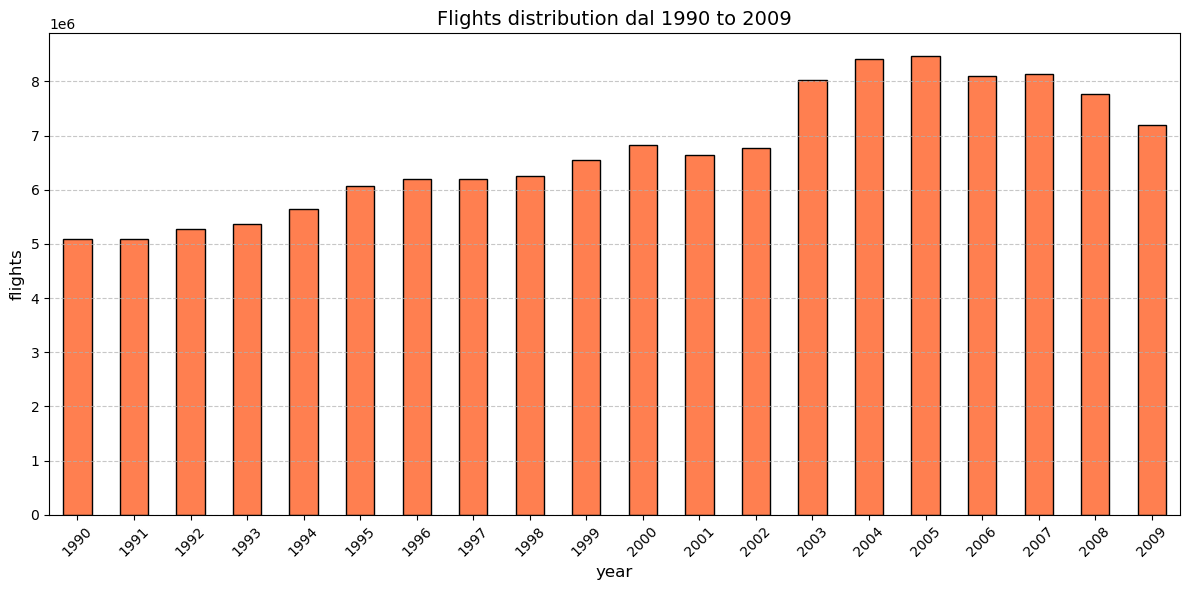

In [10]:
df['Fly_date'] = pd.to_datetime(df['Fly_date'])
flights_per_year = df.groupby(df['Fly_date'].dt.year)['Flights'].sum()
plt.figure(figsize=(12, 6))
flights_per_year.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Flights distribution dal 1990 to 2009', fontsize=14)
plt.xlabel('year', fontsize=12)
plt.ylabel('flights', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:

flights_per_year.max()

8463306

In [13]:
data_2005 = df[df['Fly_date'].dt.year == 2005]
print(data_2005)


        Origin_airport Destination_airport    Origin_city  \
911                PDX                 RDM   Portland, OR   
912                PDX                 RDM   Portland, OR   
913                PDX                 RDM   Portland, OR   
914                PDX                 RDM   Portland, OR   
915                PDX                 RDM   Portland, OR   
...                ...                 ...            ...   
3606735            STL                 TBN  St. Louis, MO   
3606736            STL                 TBN  St. Louis, MO   
3606737            STL                 TBN  St. Louis, MO   
3606738            STL                 TBN  St. Louis, MO   
3606739            STL                 TBN  St. Louis, MO   

              Destination_city  Passengers  Seats  Flights  Distance  \
911                   Bend, OR        5186   6845      185       116   
912                   Bend, OR        2781   4650      155       116   
913                   Bend, OR          66     70  

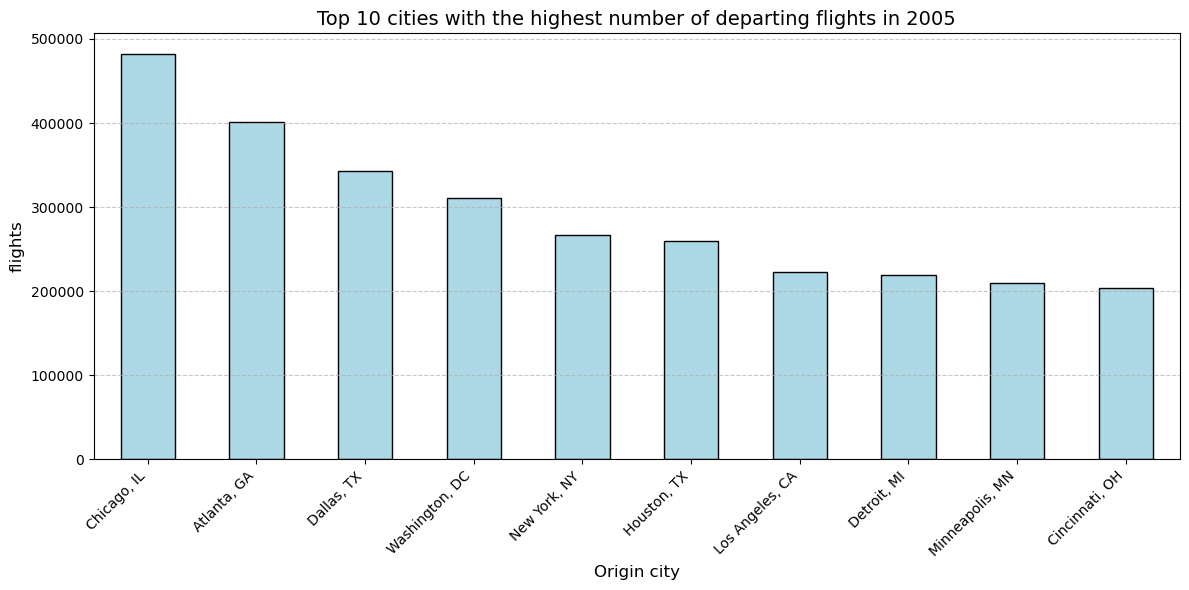

In [14]:
data_2005 = data_2005[data_2005['Fly_date'].dt.year == 2005]
flights_by_city_2005 = data_2005.groupby('Origin_city')['Flights'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
flights_by_city_2005.head(10).plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Top 10 cities with the highest number of departing flights in 2005', fontsize=14)
plt.xlabel('Origin city', fontsize=12)
plt.ylabel('flights', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Origin_airport
ORD    395395
MDW     87154
DPA        32
PWK        11
Name: Flights, dtype: int64


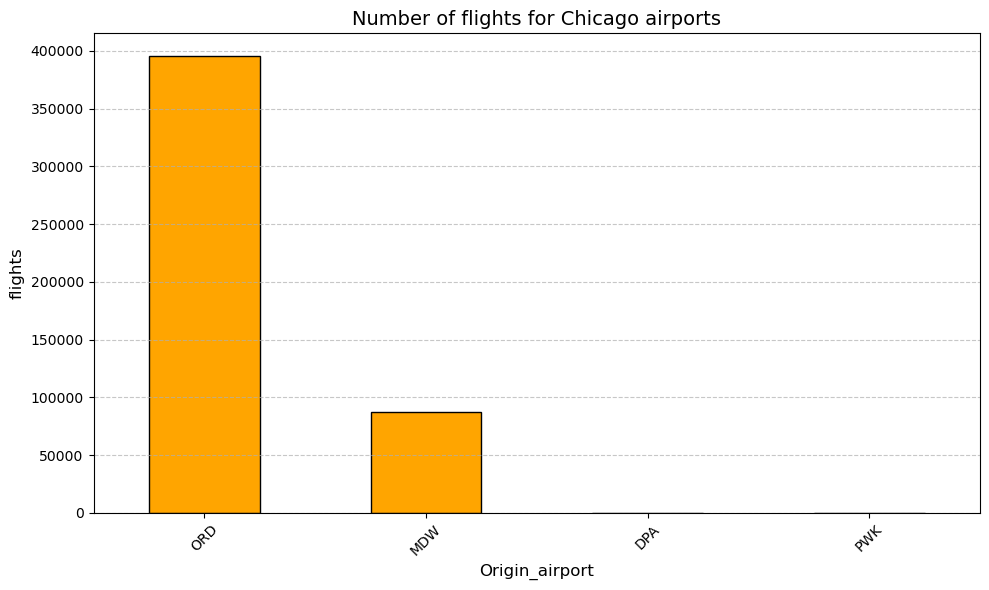

In [15]:
chicago_airports_2005 = data_2005[data_2005['Origin_city'].str.contains('Chicago', na=False)]
flights_by_airport_chicago = chicago_airports_2005.groupby('Origin_airport')['Flights'].sum().sort_values(ascending=False)
print(flights_by_airport_chicago)
plt.figure(figsize=(10, 6))
flights_by_airport_chicago.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Number of flights for Chicago airports', fontsize=14)
plt.xlabel('Origin_airport', fontsize=12)
plt.ylabel('flights', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 1 task 

1.1 task

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Function to analyze the flight network
def analyze_graph_features(flight_network):
    # Calculate the number of airports (nodes) and flights (edges)
    airports = set()
    edges = 0
    for source, destinations in flight_network.items():
        airports.add(source)
        airports.update(destinations)
        edges += len(destinations)

    num_airports = len(airports)
    num_edges = edges

    # Calculate the density of the graph
    density = 2 * num_edges / (num_airports * (num_airports - 1))

    # Compute in-degree and out-degree for each airport
    in_degree = {airport: 0 for airport in airports}
    out_degree = {airport: 0 for airport in airports}

    for source, destinations in flight_network.items():
        out_degree[source] += len(destinations)
        for destination in destinations:
            in_degree[destination] += 1

    # Prepare data for visualization
    in_degrees = list(in_degree.values())
    out_degrees = list(out_degree.values())

    # Create histograms for in-degree and out-degree
    plt.figure(figsize=(12, 6))

    # In-degree histogram
    plt.subplot(1, 2, 1)
    plt.hist(in_degrees, bins=10, alpha=0.7, edgecolor='black')
    plt.title('In-Degree Distribution')
    plt.xlabel('In-Degree')
    plt.ylabel('Frequency')

    # Out-degree histogram
    plt.subplot(1, 2, 2)
    plt.hist(out_degrees, bins=10, alpha=0.7, edgecolor='black')
    plt.title('Out-Degree Distribution')
    plt.xlabel('Out-Degree')
    plt.ylabel('Frequency')

    # Save the plot to ensure it can be viewed separately
    plt.tight_layout()
    plt.savefig("degree_distributions.png")
    print("Degree distribution plots saved as 'degree_distributions.png'.")

    # Identify hubs (airports with degrees higher than the 90th percentile)
    combined_degrees = {airport: in_degree[airport] + out_degree[airport] for airport in airports}
    threshold = np.percentile(list(combined_degrees.values()), 90)
    hubs = [airport for airport, degree in combined_degrees.items() if degree > threshold]

    # Determine if the graph is sparse or dense
    graph_type = "dense" if density > 0.5 else "sparse"

    # Print the results
    print(f"Number of airports (nodes): {num_airports}")
    print(f"Number of flights (edges): {num_edges}")
    print(f"Density of the graph: {density:.2f}")
    print(f"Graph type: {graph_type}")
    print(f"Hubs (airports with degree > 90th percentile): {hubs}")



## Algorithmic Question 

In [46]:
def find_cheapest_route(n, flights, src, dst, k):
    # Create an adjacency list
    graph = {i: [] for i in range(n)}
    for u, v, cost in flights:
        graph[u].append((v, cost))

    # Priority queue for Dijkstra-like approach
    heap = [(0, src, 0)]  # (cost, current_node, stops)
    min_cost = {src: 0}

    while heap:
        cost, node, stops = heapq.heappop(heap)

        if node == dst:
            return cost

        if stops <= k:
            for neighbor, price in graph[node]:
                new_cost = cost + price
                if new_cost < min_cost.get((neighbor, stops + 1), float('inf')):
                    min_cost[(neighbor, stops + 1)] = new_cost
                    heapq.heappush(heap, (new_cost, neighbor, stops + 1))

    return -1



In [50]:
# Example usage

n = 3  
flights = [[0, 1, 100], [1, 2, 100], [0, 2, 500]]  
src = 0  
dst = 2  
k = 1  
print(find_cheapest_route(n,flights, src, dst, k))
 

200


In [51]:
n = 3  
flights = [[0, 1, 100], [1, 2, 100], [0, 2, 500]]  
src = 0  
dst = 2  
k = 0  
print(find_cheapest_route(n,flights, src, dst, k))

500


In [56]:
n = 4  
flights = [[0, 1, 100], [0, 2, 200], [1, 3, 300], [2, 3, 300]]  
src = 0  
dst = 3  
k = 2  
print(find_cheapest_route(n,flights, src, dst, k))

400


In [53]:
n = 4  
flights = [[0, 1, 100], [0, 2, 200], [1, 3, 300], [2, 3, 200]]  
src = 0  
dst = 3  
k = 2  
print(find_cheapest_route(n,flights, src, dst, k))

400


# Finding the Cheapest Route with At Most k Stops

## **Pseudocode**
### **1. Initialize Structures:**
- Create an adjacency list from the `flights` array.
- Initialize a priority queue (min-heap) with the starting node, cost = 0, and stops = 0.
- Use a dictionary to keep track of the minimum cost to reach a node with a given number of stops.

### **2. Processing the Priority Queue:**
- While the priority queue is not empty:
  - Extract the node with the minimum cost from the heap.
  - If the node is the destination, return its cost.
  - If the current stops are within the allowed range:
    - Explore all neighbors of the current node.
    - Calculate the new cost and update the heap if the cost is lower than the previously recorded cost for the node with the same stops.

### **3. Return:**
- If the destination cannot be reached within the constraints, return -1.

---

## **Python Implementation**
The implementation is already included in the provided code. It uses a priority queue and keeps track of costs and stops for efficient processing.

---

## **Efficiency Analysis**

### **Time Complexity:**
- **Graph Construction:** $O(E)$, where $E$ is the number of flights.
- **Priority Queue Processing:**
  - At most, each node can be processed $k+1$ times (for every possible stop count).
  - Each operation (push/pop) in the priority queue is $O(\log(V))$, where $V$ is the number of nodes.
  - **Total:** $O((k+1) \cdot E \cdot \log(V))$.

### **Space Complexity:**
- **Adjacency List:** $O(E)$.
- **Priority Queue:** $O(V)$.
- **Min-Cost Tracking:** $O(V \cdot k)$.

### **Scalability:**
Efficient for graphs with $n > 100$, provided $k$ is small, as the complexity scales with $k+1$.

---

## **Optimization for Larger Graphs**
For very large graphs:
1. **Early Termination:**
   - If the minimum cost for a node exceeds the current best cost to the destination, skip further processing.
2. **Bidirectional Search:**
   - Search simultaneously from the source and destination to meet in the middle.

---

## **Optimized Pseudocode**
1. Initialize the adjacency list and reverse adjacency list.
2. Use two priority queues:
   - One for forward search from the source.
   - Another for backward search from the destination.
3. Alternate expanding nodes from both ends.
4. Return the minimum cost when paths meet.

---

